Shape: (106322, 22)
Columns: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']
Data types:
 CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PED

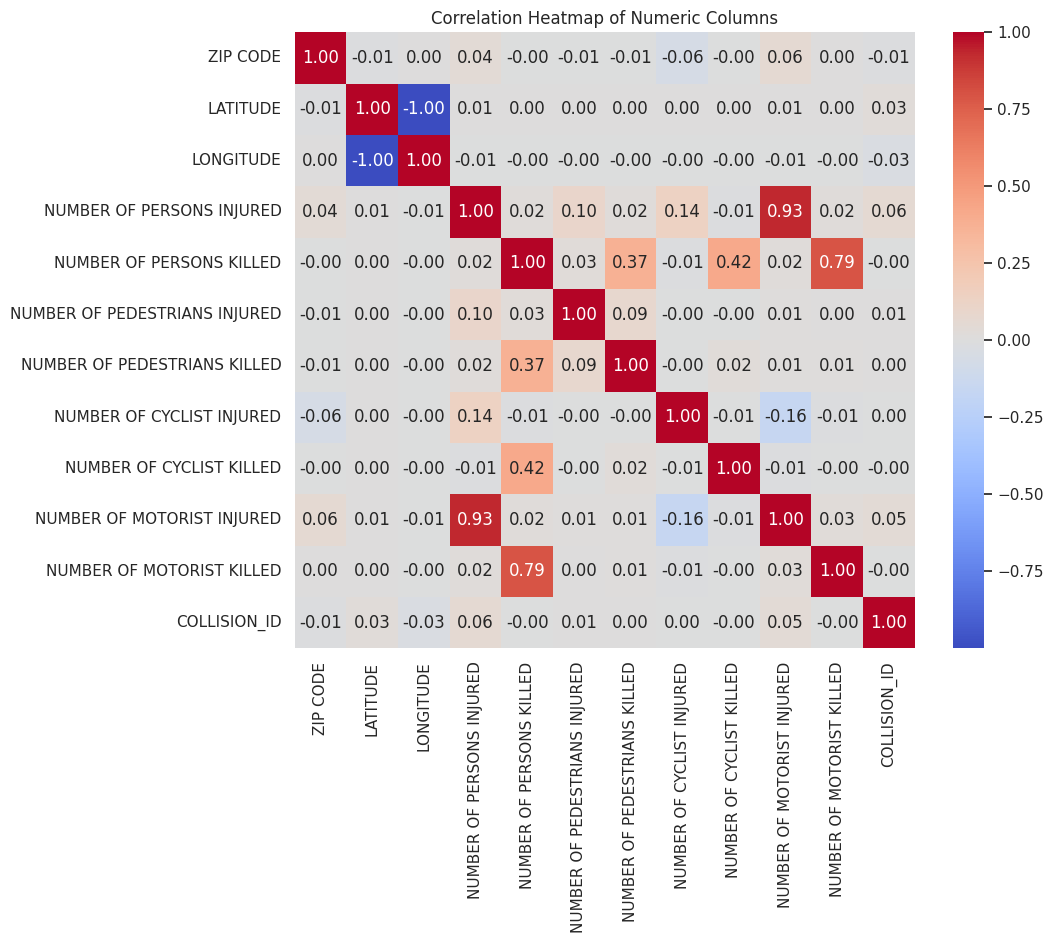

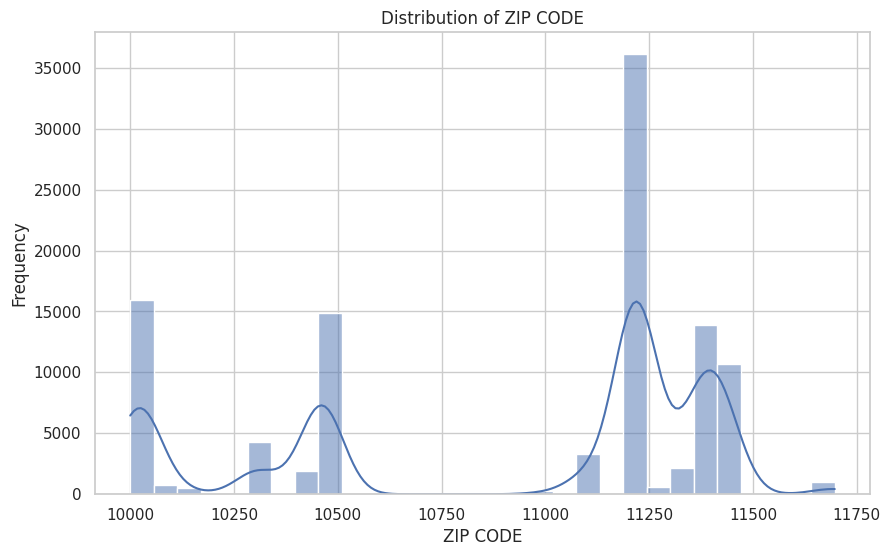

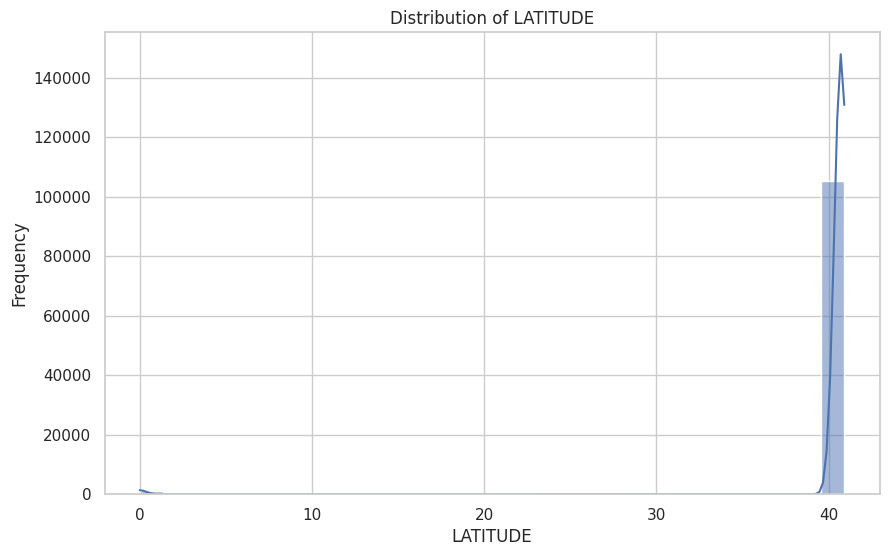

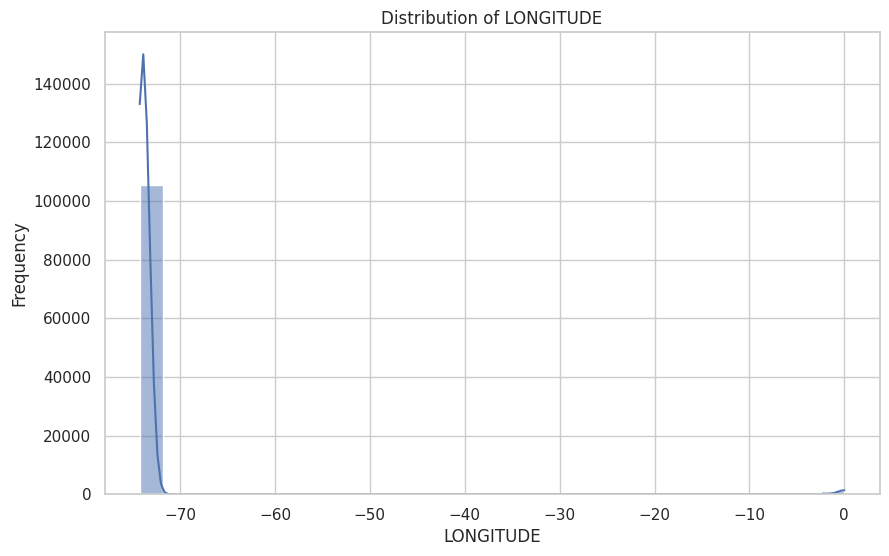

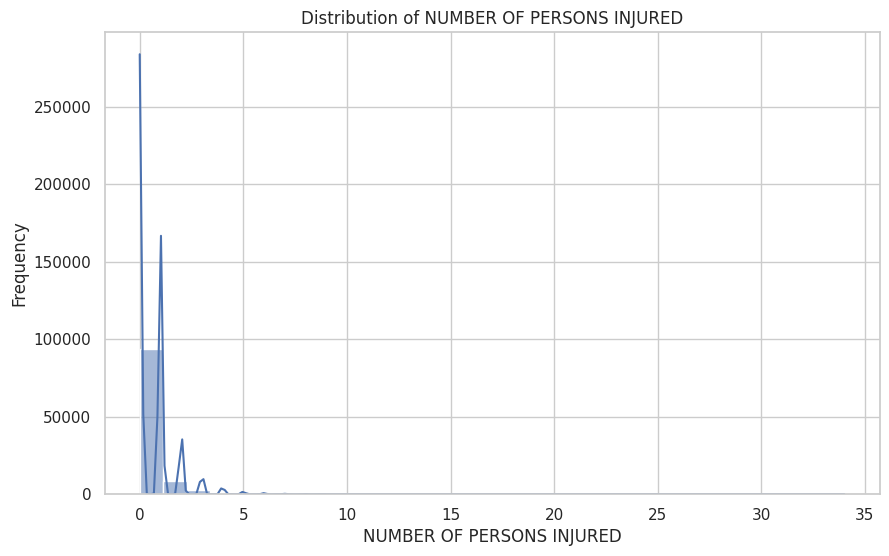

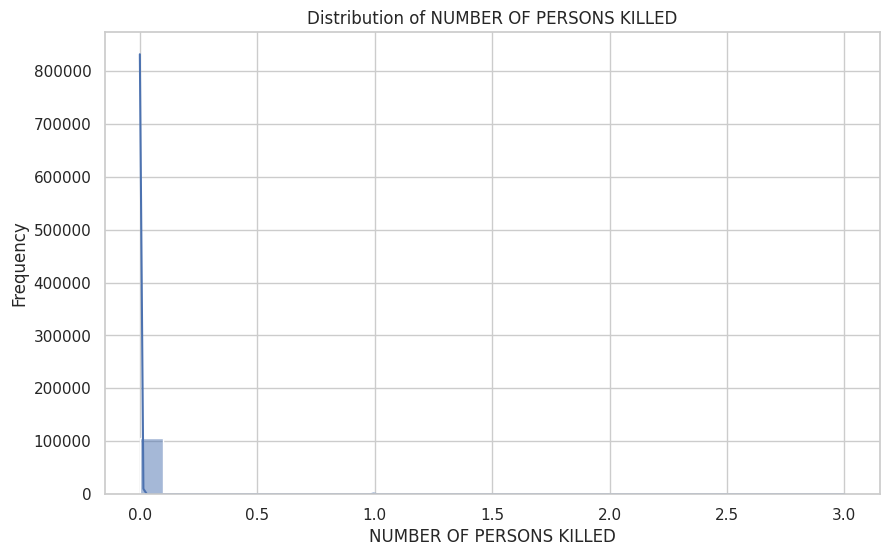

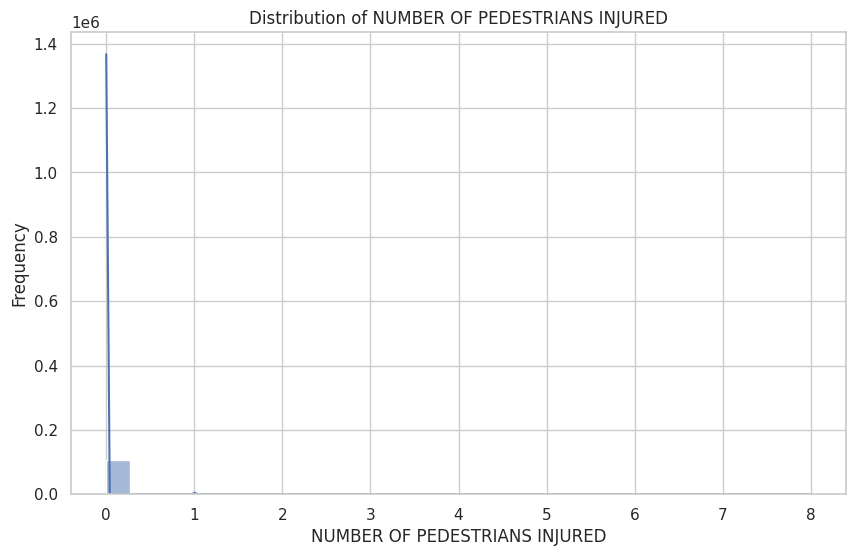

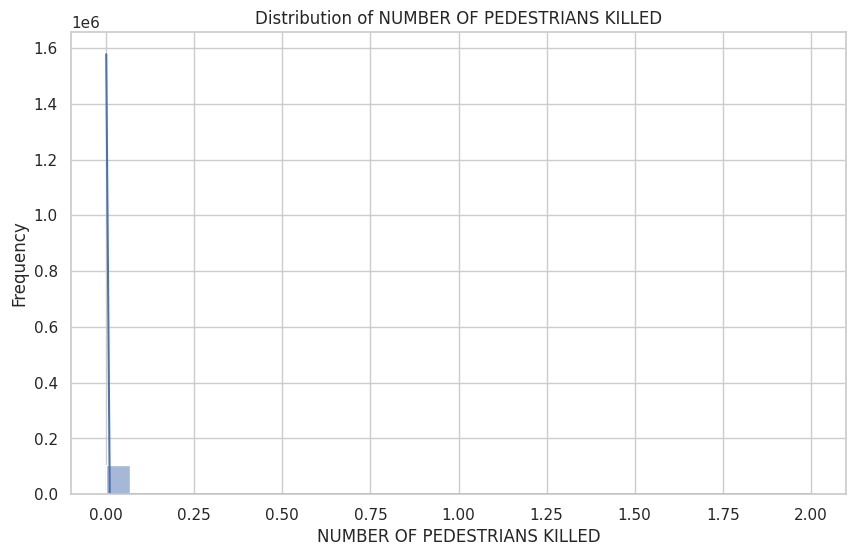

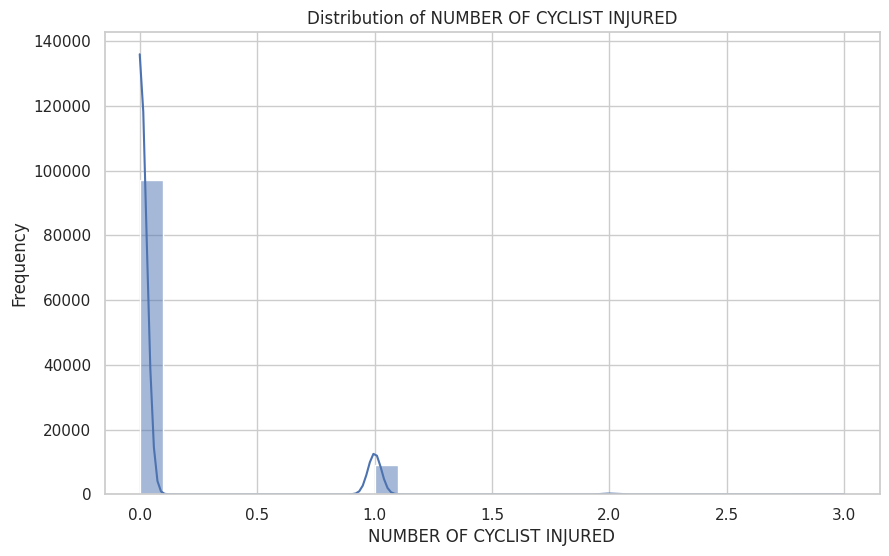

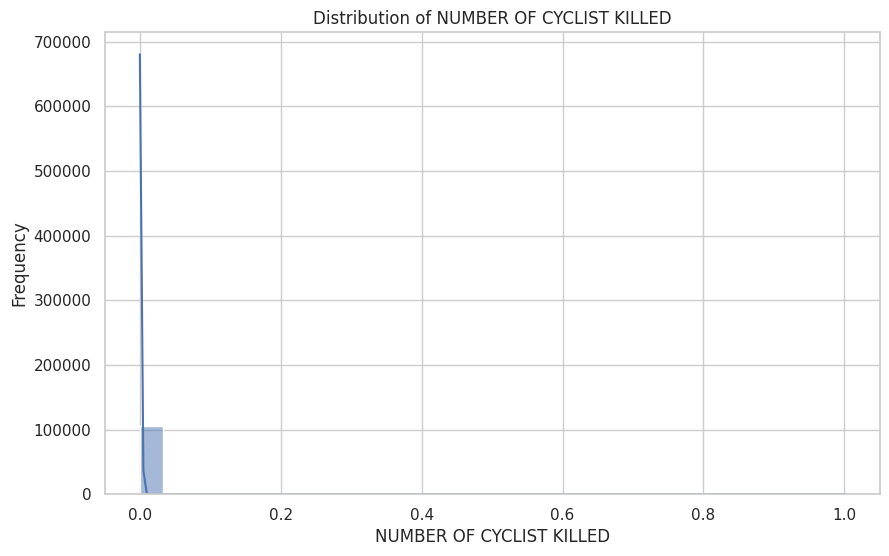

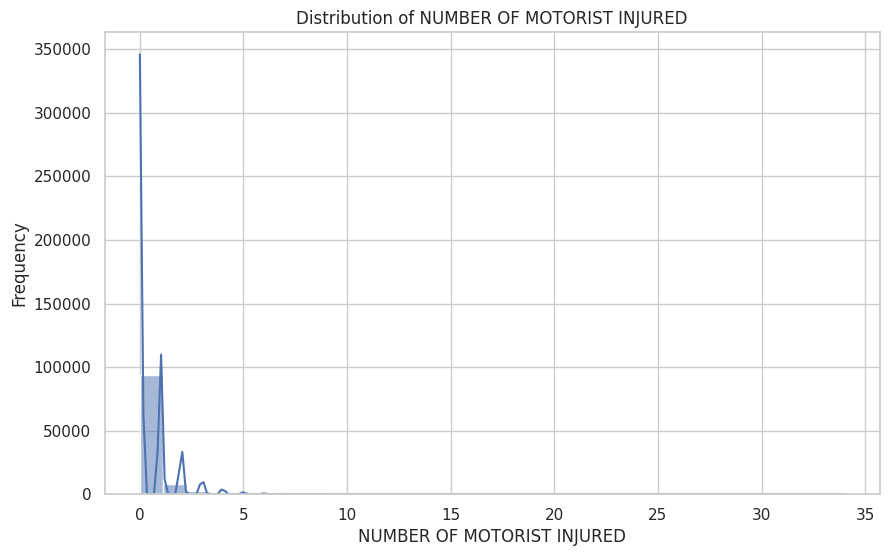

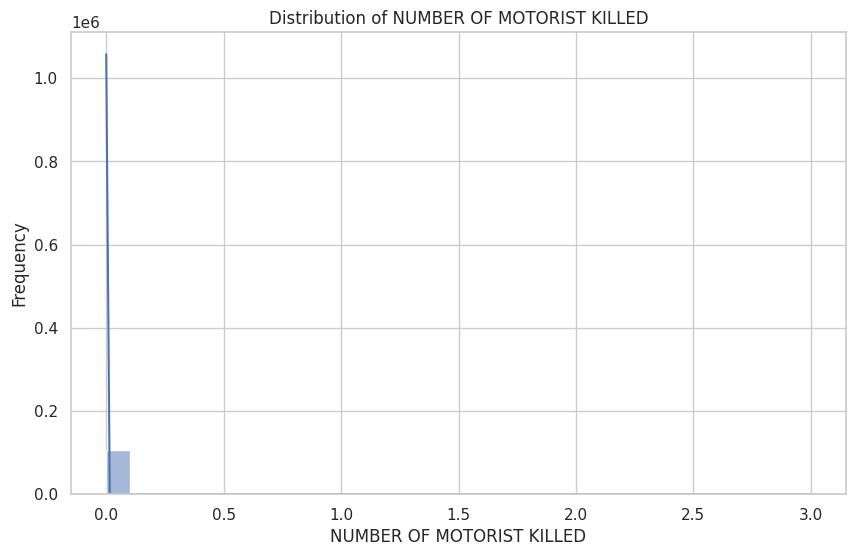

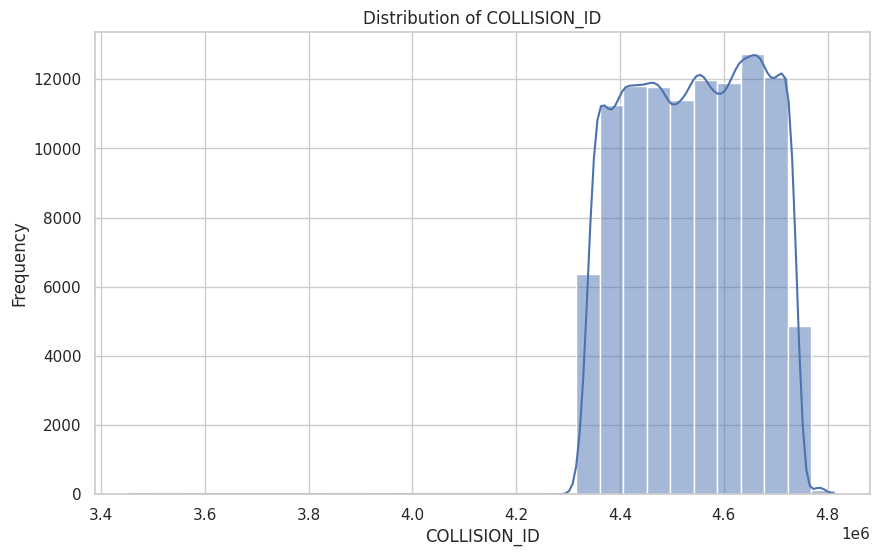

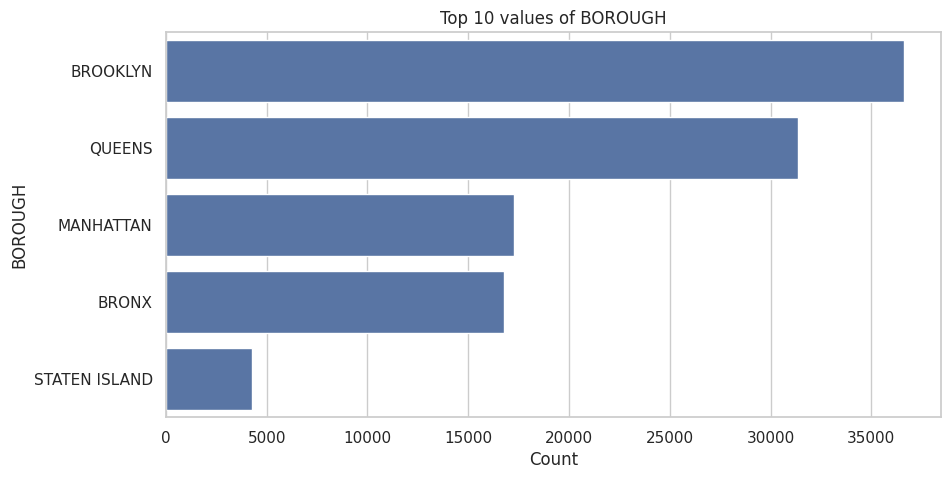

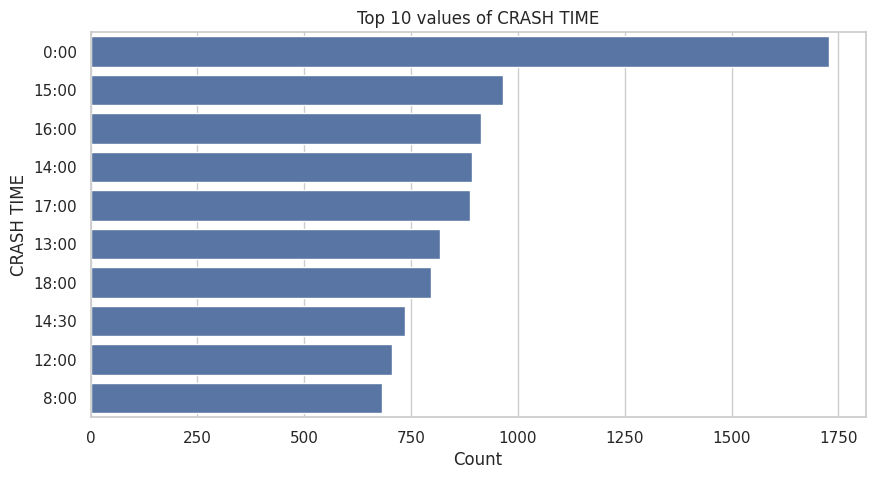

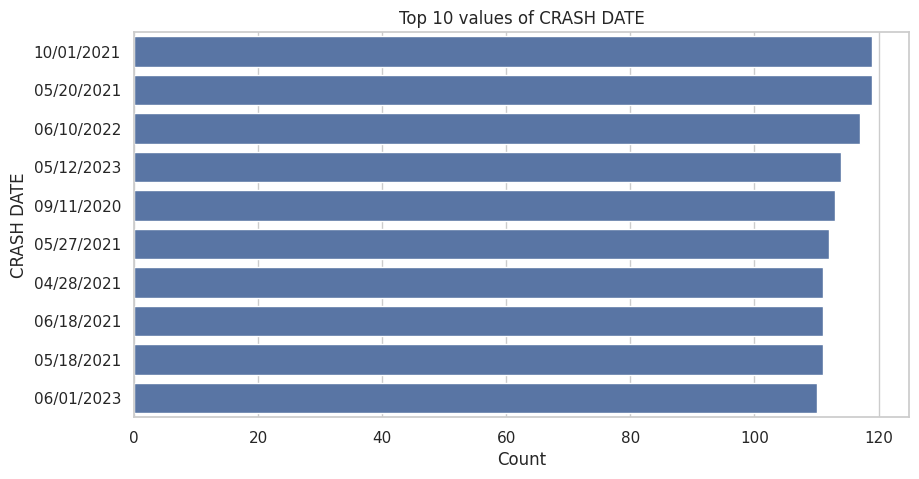

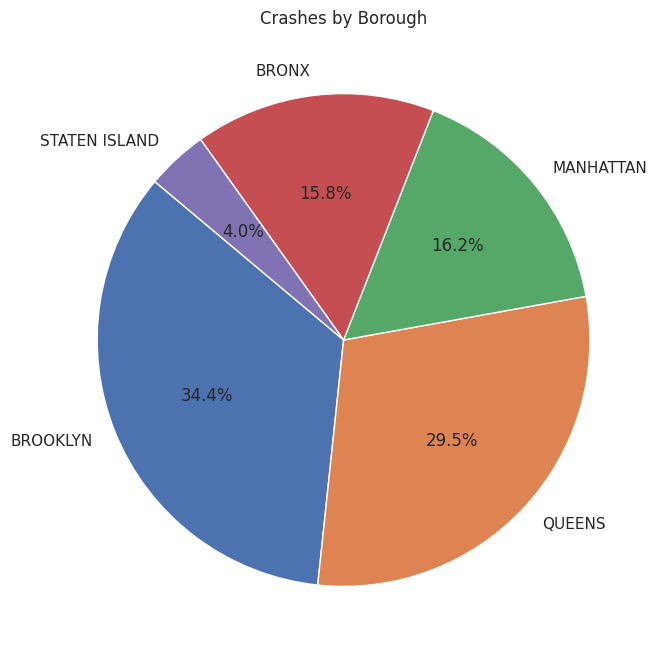

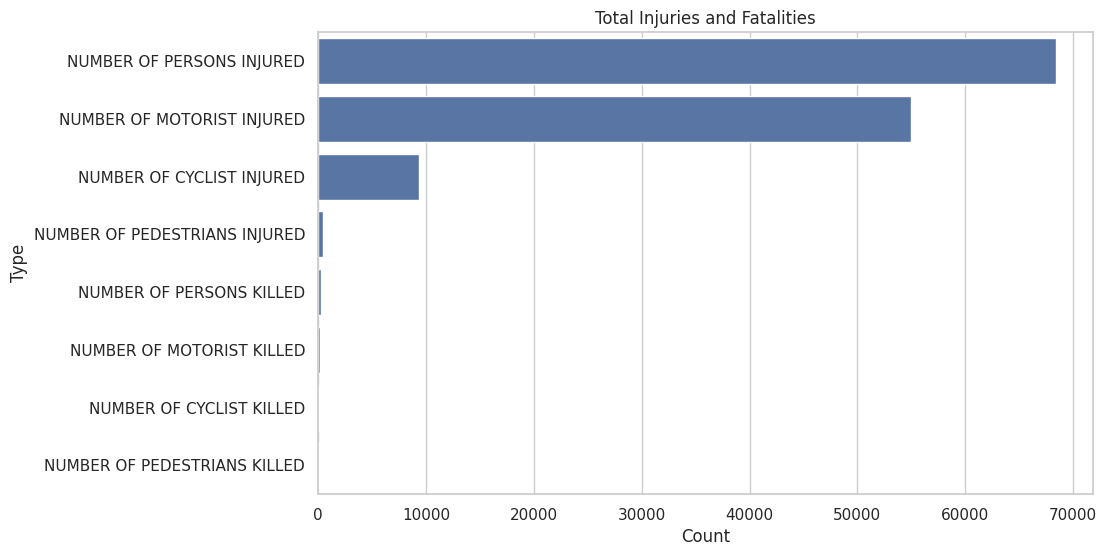

/tmp/ipython-input-2051807178.py:64: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HOUR'] = pd.to_datetime(data['CRASH TIME'], errors='coerce').dt.hour
/tmp/ipython-input-2051807178.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


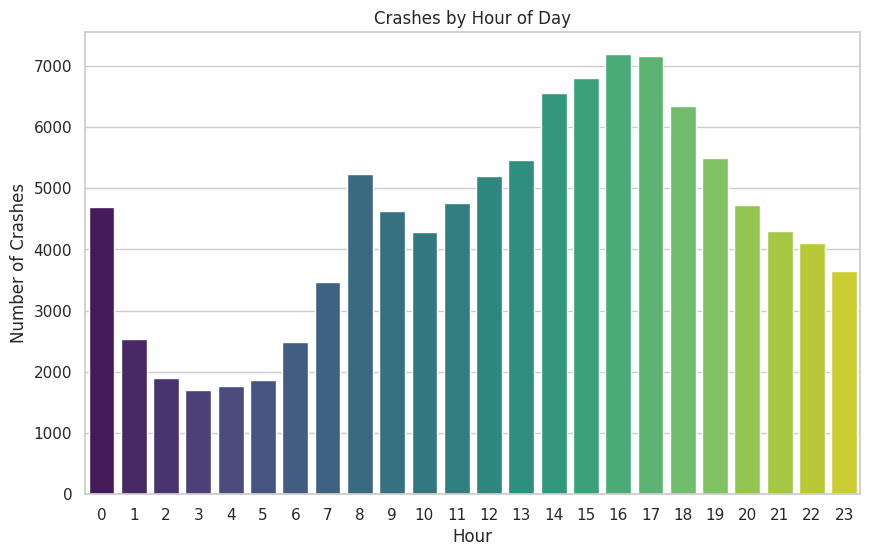

/tmp/ipython-input-2051807178.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.values, y=top_factors.index, palette="magma")


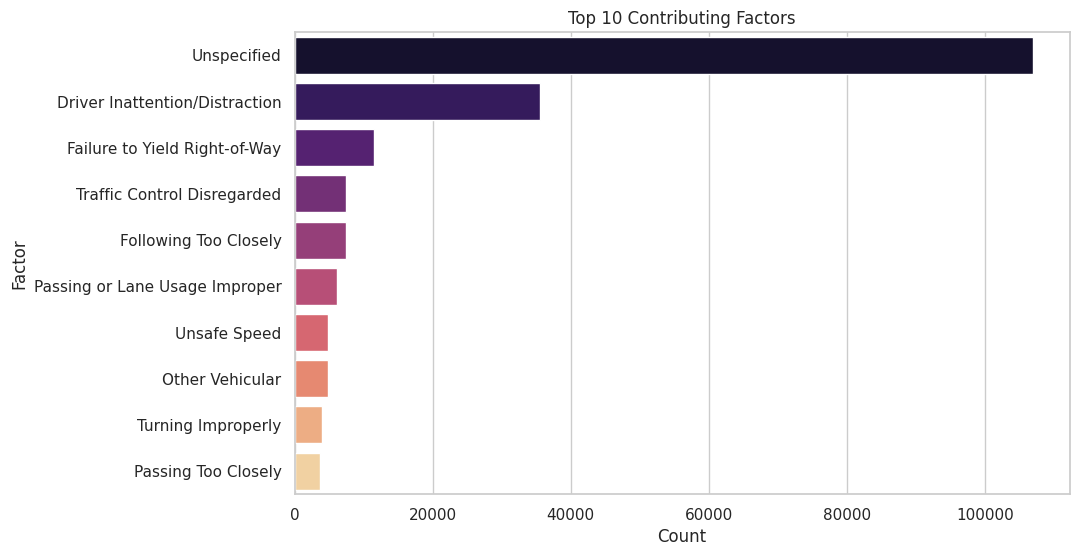

/tmp/ipython-input-2051807178.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_veh.values, y=top_veh.index, palette="coolwarm")


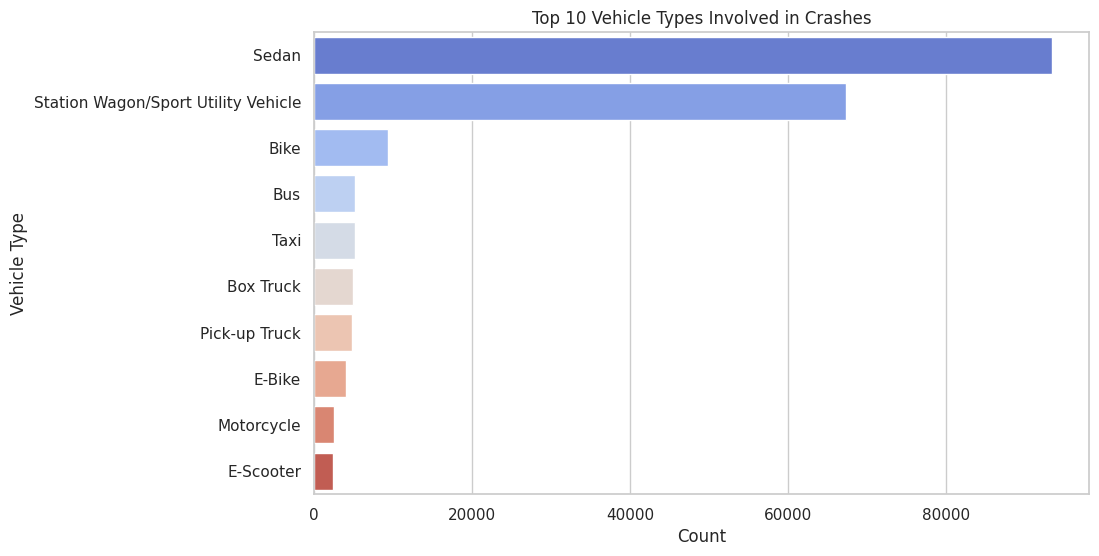

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("output.csv")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Basic overview
print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Data types:\n", data.dtypes)
print("\nMissing values:\n", data.isna().sum())

# 2. Correlation heatmap
numeric_cols = data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

# 3. Distribution of numeric variables
for col in numeric_cols.columns:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 4. Bar plots for key categorical variables
cat_cols = ['BOROUGH', 'CRASH TIME', 'CRASH DATE']
for col in cat_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.title(f"Top 10 values of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

# 5. Pie chart of crashes by borough
if 'BOROUGH' in data.columns:
    borough_counts = data['BOROUGH'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Crashes by Borough")
    plt.show()

# 6. Injuries vs fatalities bar chart
injury_fatal_cols = [col for col in data.columns if "INJURED" in col or "KILLED" in col]
if injury_fatal_cols:
    injury_fatal_sums = data[injury_fatal_cols].sum().sort_values(ascending=False)
    sns.barplot(x=injury_fatal_sums.values, y=injury_fatal_sums.index)
    plt.title("Total Injuries and Fatalities")
    plt.xlabel("Count")
    plt.ylabel("Type")
    plt.show()

# 7. Heatmap of crashes by hour of day
if 'CRASH TIME' in data.columns:
    data['HOUR'] = pd.to_datetime(data['CRASH TIME'], errors='coerce').dt.hour
    hour_counts = data['HOUR'].value_counts().sort_index()
    sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")
    plt.title("Crashes by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Crashes")
    plt.show()

# 8. Top contributing factors
factor_cols = [col for col in data.columns if "CONTRIBUTING FACTOR" in col]
if factor_cols:
    all_factors = pd.concat([data[col] for col in factor_cols])
    top_factors = all_factors.value_counts().head(10)
    sns.barplot(x=top_factors.values, y=top_factors.index, palette="magma")
    plt.title("Top 10 Contributing Factors")
    plt.xlabel("Count")
    plt.ylabel("Factor")
    plt.show()

# 9. Vehicle type analysis
veh_cols = [col for col in data.columns if "VEHICLE TYPE CODE" in col]
if veh_cols:
    all_veh = pd.concat([data[col] for col in veh_cols])
    top_veh = all_veh.value_counts().head(10)
    sns.barplot(x=top_veh.values, y=top_veh.index, palette="coolwarm")
    plt.title("Top 10 Vehicle Types Involved in Crashes")
    plt.xlabel("Count")
    plt.ylabel("Vehicle Type")
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#reading in the cleaned up ver of the file rather than the 2m rows one
data = pd.read_csv("output.csv")

In [ ]:

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

print("Shape:", data.shape)
print("Columns:", data.columns.tolist())
print("Data types:\n", data.dtypes)
print("\nMissing values:\n", data.isna().sum())

Shape: (208616, 22)
Columns: ['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2']
Data types:
 CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PED

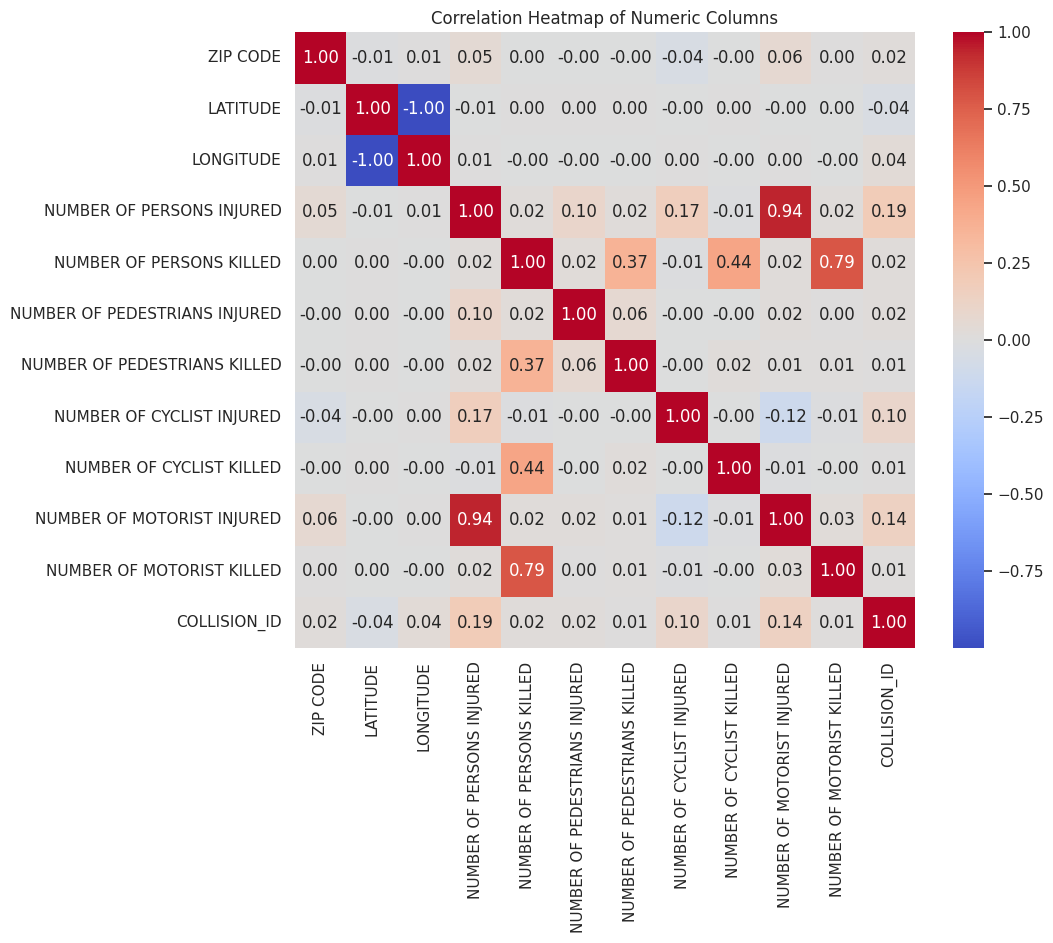

In [ ]:
# 2. Correlation heatmap
# add contributing factors to this
# add vehicle type

numeric_cols = data.select_dtypes(include=[np.number])
corr = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()


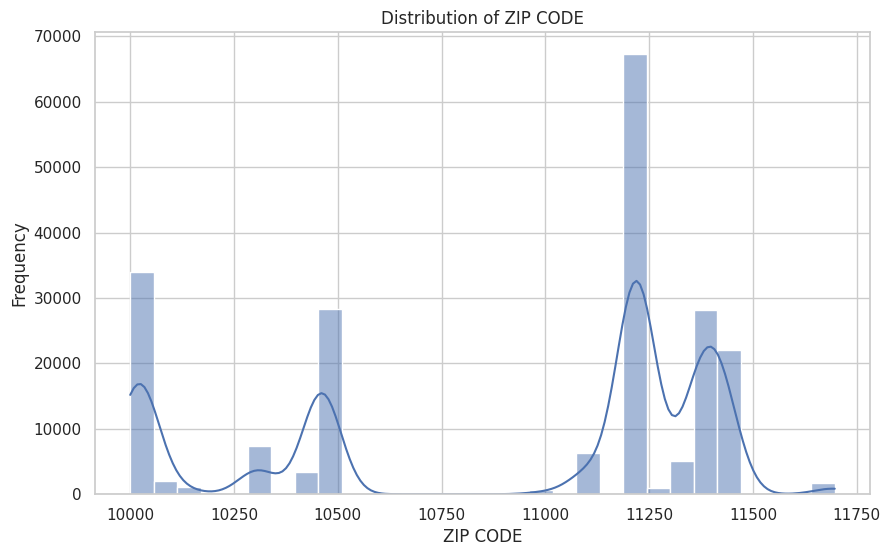

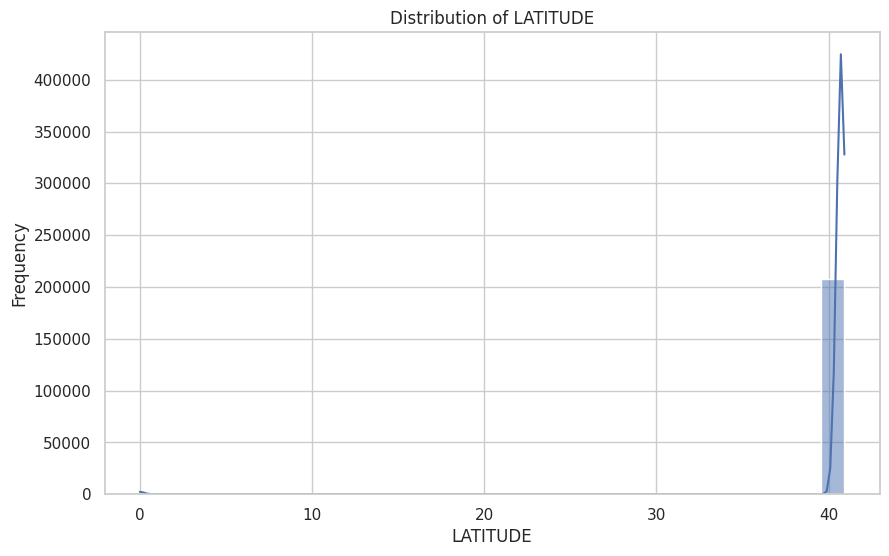

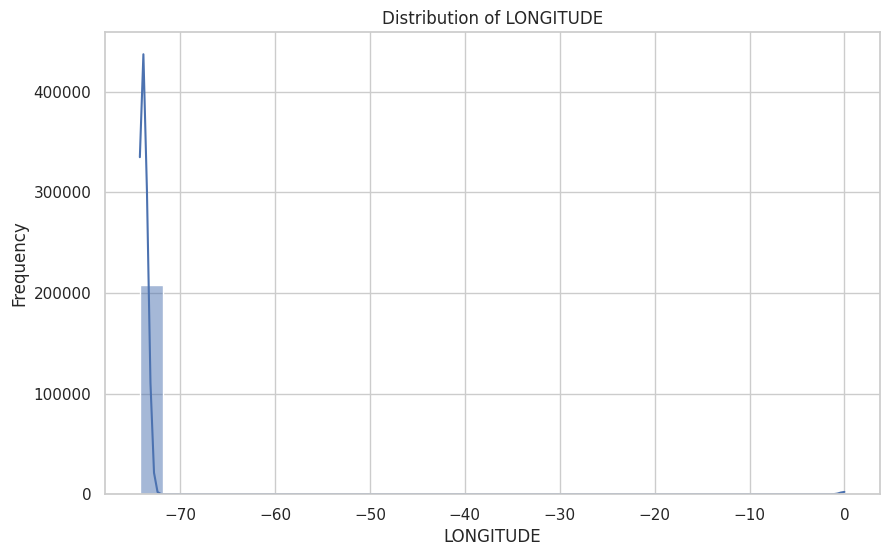

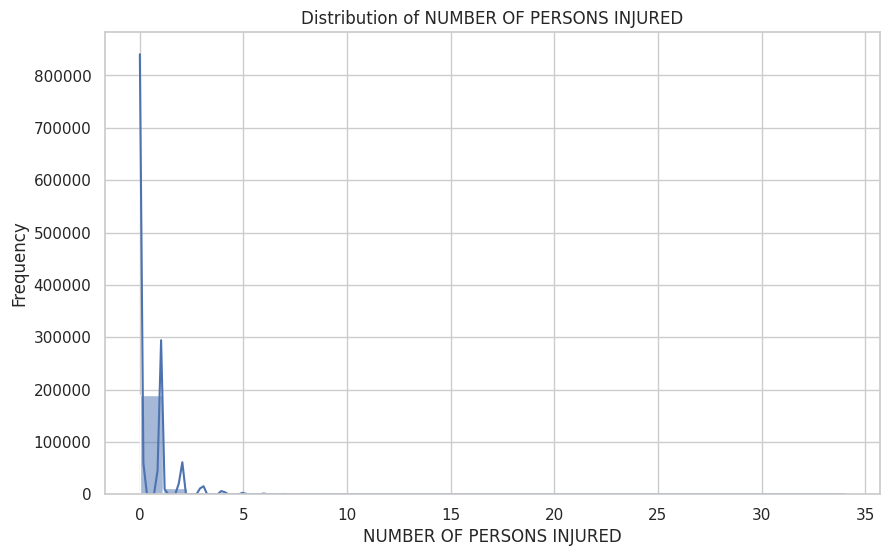

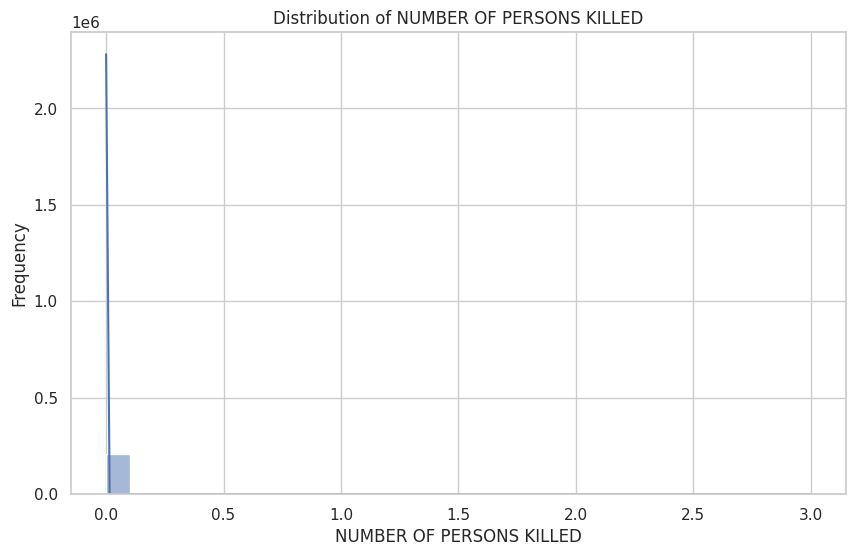

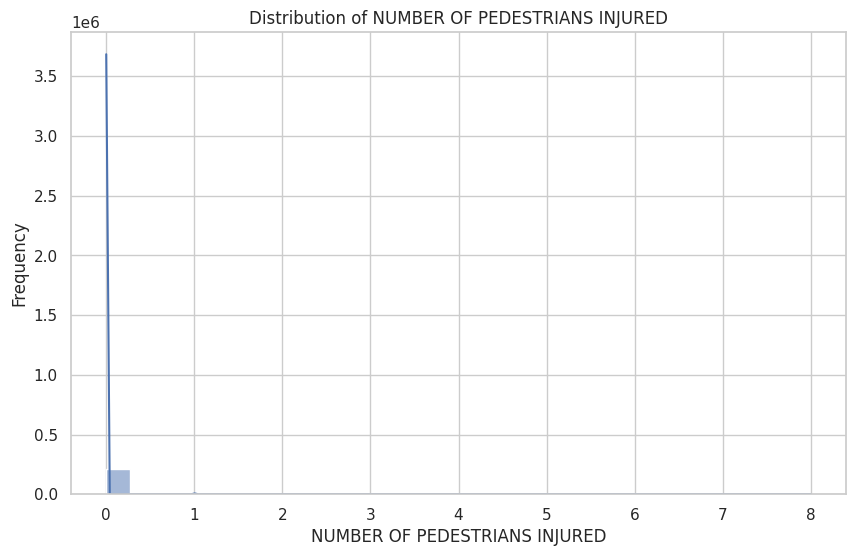

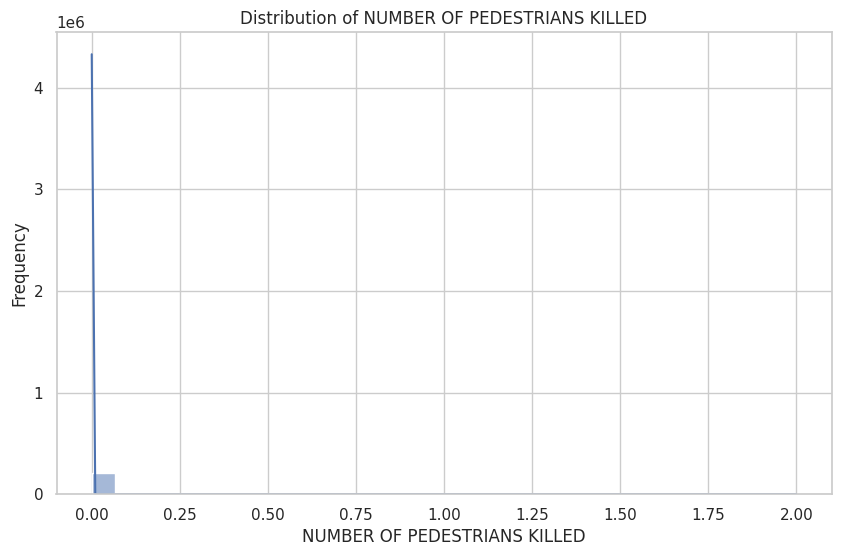

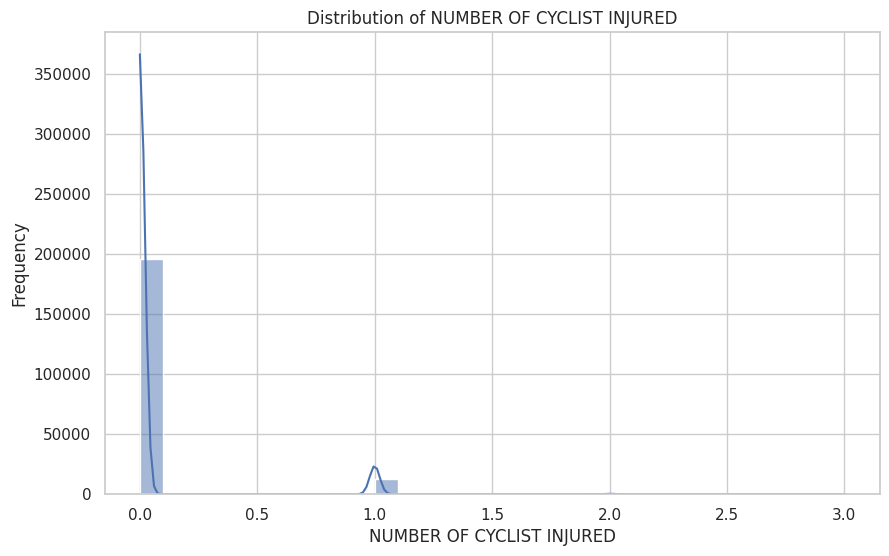

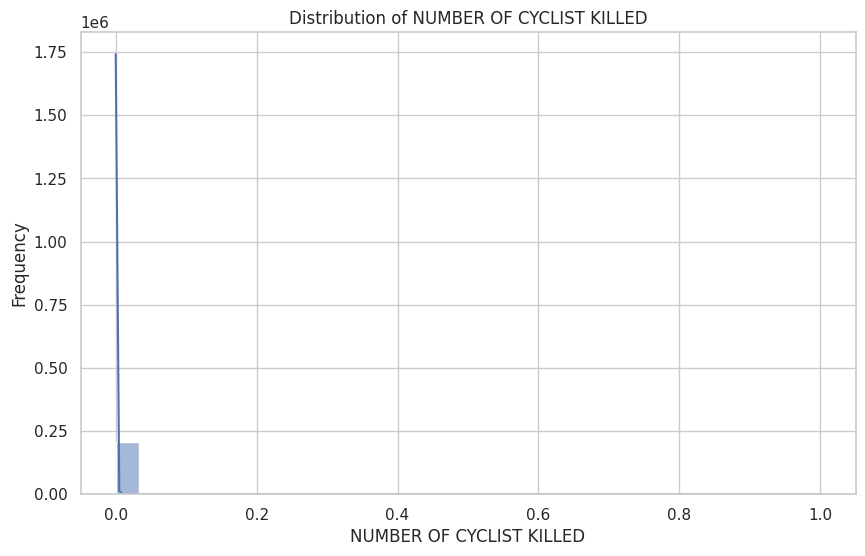

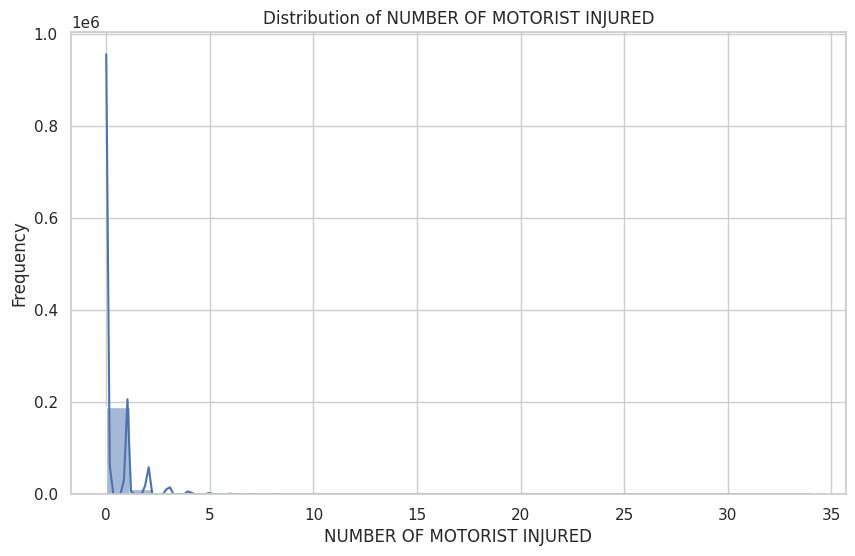

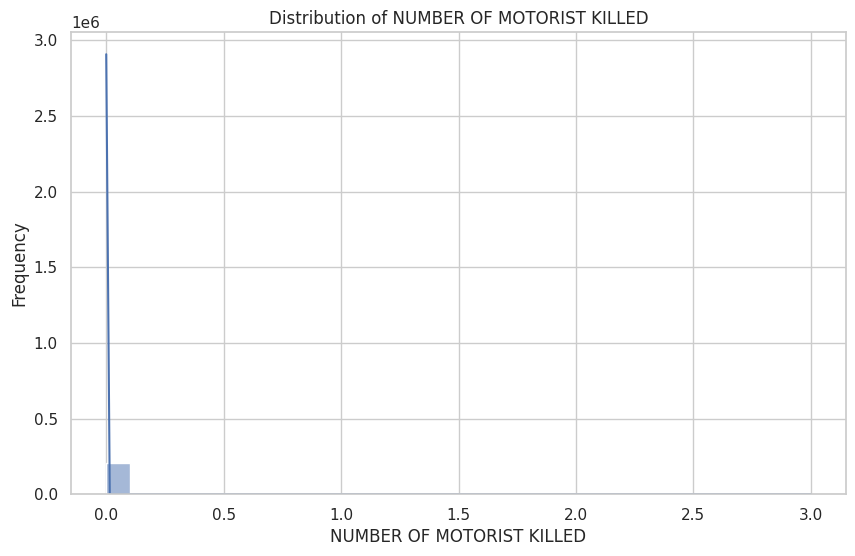

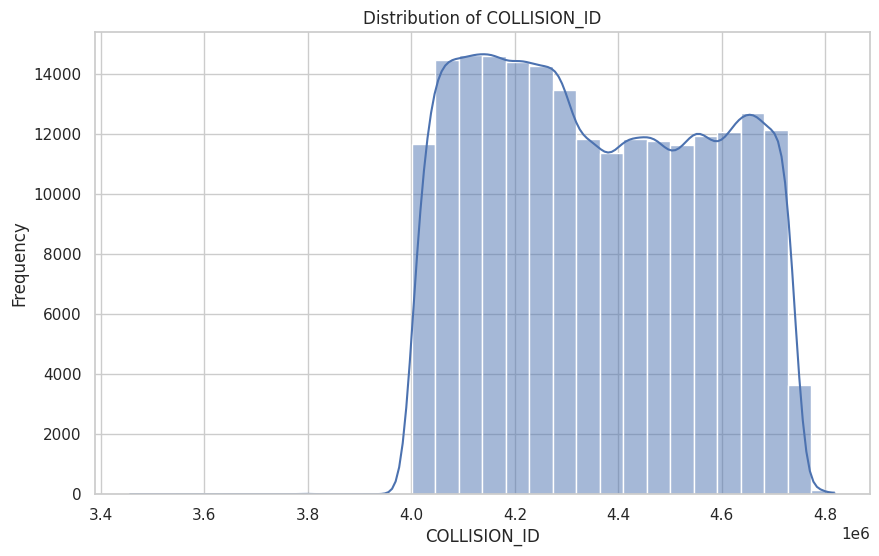

In [ ]:
# 3. Distribution of numeric variables

for col in numeric_cols.columns:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

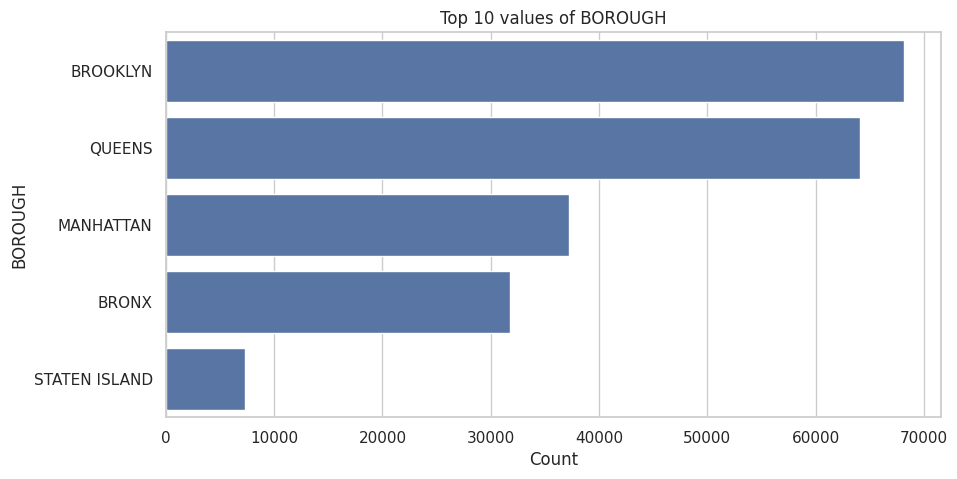

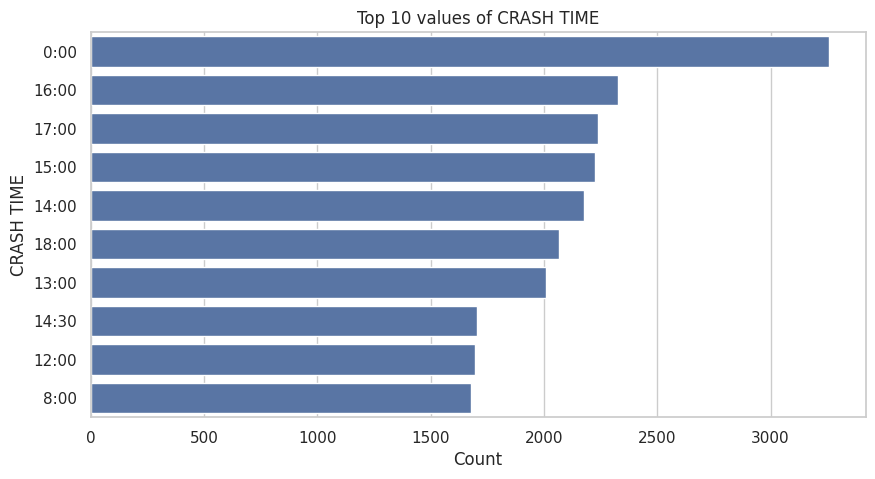

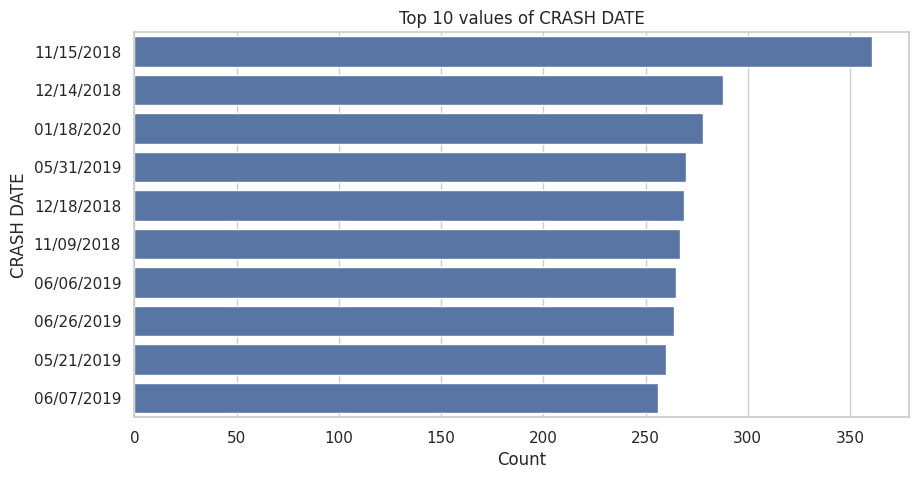

In [ ]:
# 4. Bar plots for key categorical variables

cat_cols = ['BOROUGH', 'CRASH TIME', 'CRASH DATE']
for col in cat_cols:
    if col in data.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=col, data=data, order=data[col].value_counts().iloc[:10].index)
        plt.title(f"Top 10 values of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)
        plt.show()

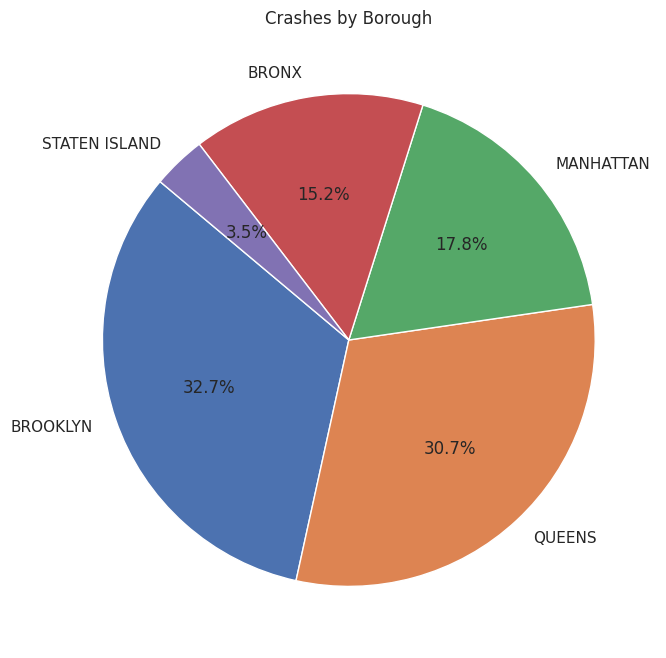

In [ ]:
# 5. Pie chart of crashes by borough

if 'BOROUGH' in data.columns:
    borough_counts = data['BOROUGH'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title("Crashes by Borough")
    plt.show()

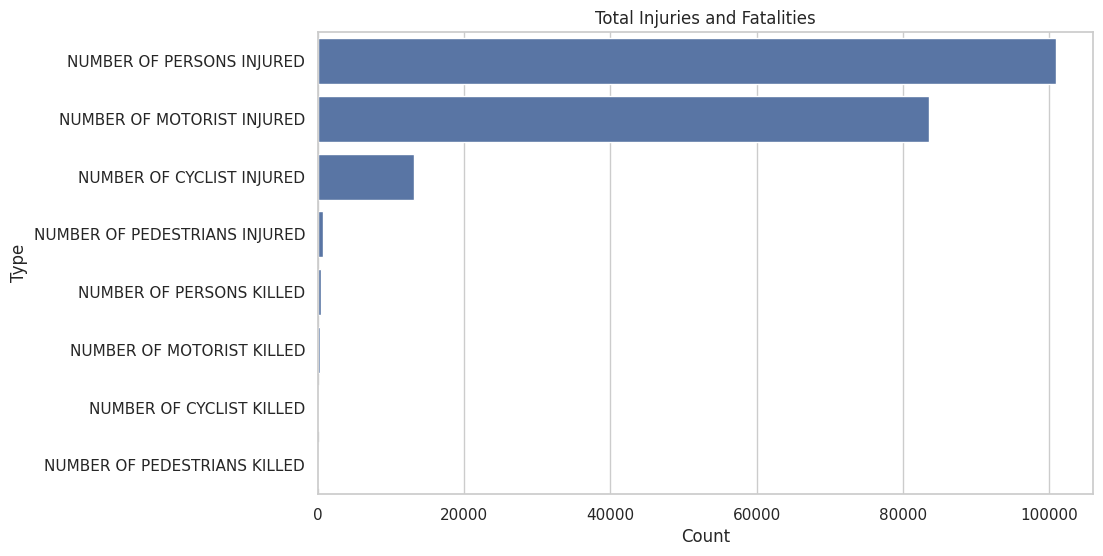

In [ ]:
# 6. injuries vs fatalities bar chart

injury_fatal_cols = [col for col in data.columns if "INJURED" in col or "KILLED" in col]
if injury_fatal_cols:
    injury_fatal_sums = data[injury_fatal_cols].sum().sort_values(ascending=False)
    sns.barplot(x=injury_fatal_sums.values, y=injury_fatal_sums.index)
    plt.title("Total Injuries and Fatalities")
    plt.xlabel("Count")
    plt.ylabel("Type")
    plt.show()

/tmp/ipython-input-2099340449.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['HOUR'] = pd.to_datetime(data['CRASH TIME'], errors='coerce').dt.hour
/tmp/ipython-input-2099340449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")


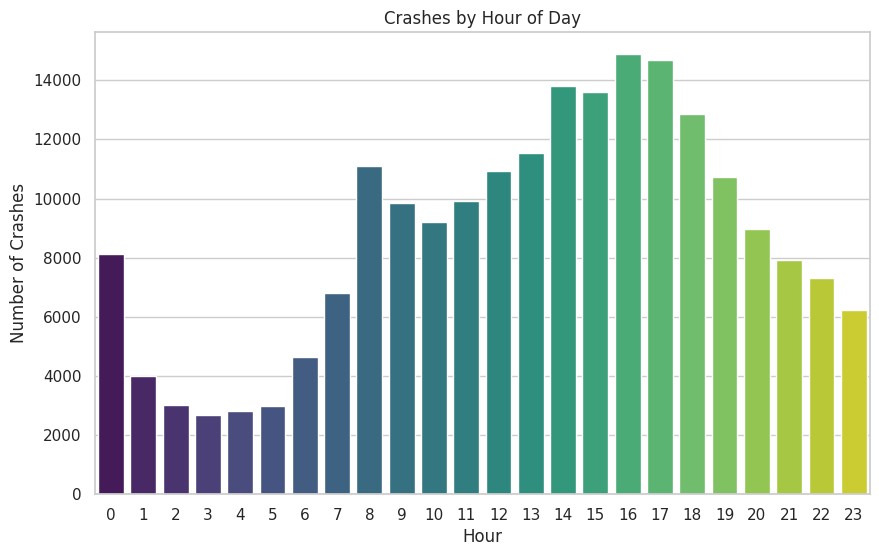

In [ ]:
# 7. heatmap of crashes per hour of day

if 'CRASH TIME' in data.columns:
    data['HOUR'] = pd.to_datetime(data['CRASH TIME'], errors='coerce').dt.hour
    hour_counts = data['HOUR'].value_counts().sort_index()
    sns.barplot(x=hour_counts.index, y=hour_counts.values, palette="viridis")
    plt.title("Crashes by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Crashes")
    plt.show()


/tmp/ipython-input-2729455039.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_factors.values, y=top_factors.index, palette="magma")


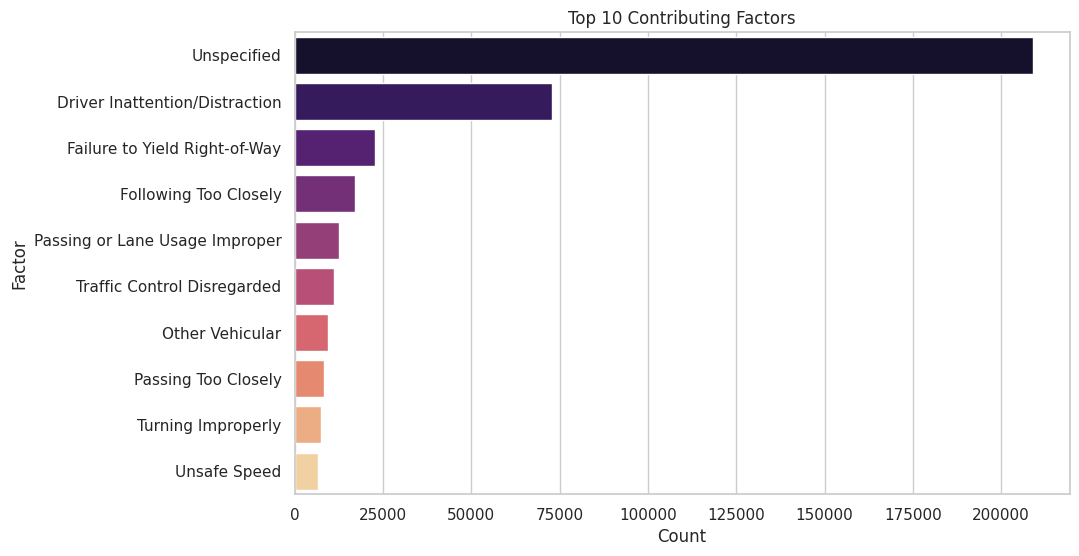

In [ ]:
# 8. top factors in crashing

factor_cols = [col for col in data.columns if "CONTRIBUTING FACTOR" in col]
if factor_cols:
    all_factors = pd.concat([data[col] for col in factor_cols])
    top_factors = all_factors.value_counts().head(10)
    sns.barplot(x=top_factors.values, y=top_factors.index, palette="magma")
    plt.title("Top 10 Contributing Factors")
    plt.xlabel("Count")
    plt.ylabel("Factor")
    plt.show()

/tmp/ipython-input-1991906753.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_veh.values, y=top_veh.index, palette="coolwarm")


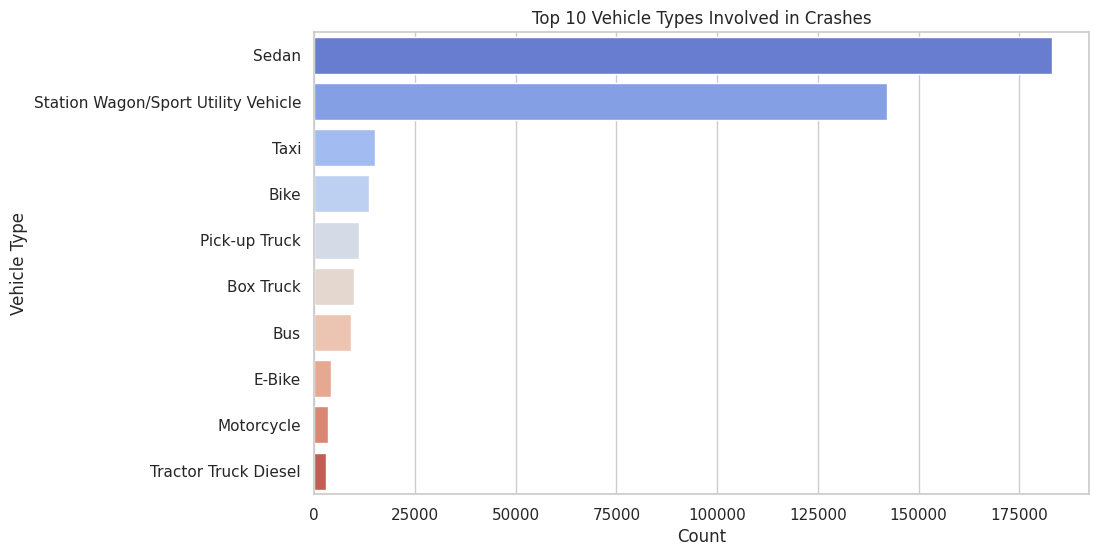

In [ ]:
# 9. vehicle type analysis

veh_cols = [col for col in data.columns if "VEHICLE TYPE CODE" in col]
if veh_cols:
    all_veh = pd.concat([data[col] for col in veh_cols])
    top_veh = all_veh.value_counts().head(10)
    sns.barplot(x=top_veh.values, y=top_veh.index, palette="coolwarm")
    plt.title("Top 10 Vehicle Types Involved in Crashes")
    plt.xlabel("Count")
    plt.ylabel("Vehicle Type")
    plt.show()

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix
)

# 1. Load the data
df = pd.read_csv("output.csv")

# 2. fatal_flag stuff
df["fatal_flag"] = df["NUMBER OF PERSONS KILLED"].apply(
    lambda x: 1 if x > 0 else 0
)

# 3. cleaned up features
df["CRASH_HOUR"] = pd.to_datetime(df["CRASH TIME"], errors="coerce").dt.hour

#  field with vehicle type and in this case code 1. This can be changed around too just like the code below showing the graph
clean_df = df[["CRASH_HOUR", "VEHICLE TYPE CODE 1", "fatal_flag"]].dropna()

# definitions
X = clean_df[["CRASH_HOUR", "VEHICLE TYPE CODE 1"]]
y = clean_df["fatal_flag"]

# 4. Preprocessing
categorical_features = ["VEHICLE TYPE CODE 1"]
numeric_features = ["CRASH_HOUR"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)

# 5. logres model
model = LogisticRegression(
    class_weight="balanced",
    max_iter=500
)

pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", model)
])

# 6. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0, stratify=y
)

# 7. fitting model
pipeline.fit(X_train, y_train)

# 8. Predictions
y_pred = pipeline.predict(X_test)

# 9. model eval
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("==== Logistic Regression: Crash Time + Vehicle Type ====")
print(f"Accuracy:      {acc:.4f}")
print(f"Precision:     {prec:.4f}")
print(f"Recall:        {rec:.4f}")
print(f"F1 Score:      {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)


/tmp/ipython-input-22671615.py:13: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output.csv")
/tmp/ipython-input-22671615.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CRASH_HOUR"] = pd.to_datetime(df["CRASH TIME"], errors="coerce").dt.hour
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


==== Logistic Regression: Crash Time + Vehicle Type ====
Accuracy:      0.7456
Precision:     0.0019
Recall:        0.5744
F1 Score:      0.0038

Confusion Matrix:
[[174120  59364]
 [    83    112]]


In [ ]:
#this code here shows the first and the second graph, with both the 100% accuracy and the around 70% accuracy.

/tmp/ipython-input-84514116.py:10: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output.csv")



=== MODEL 1: Perfect Injury Model (Leakage) ===
Accuracy: 1.0
Confusion Matrix:
 [[185461      0]
 [     0  48218]]


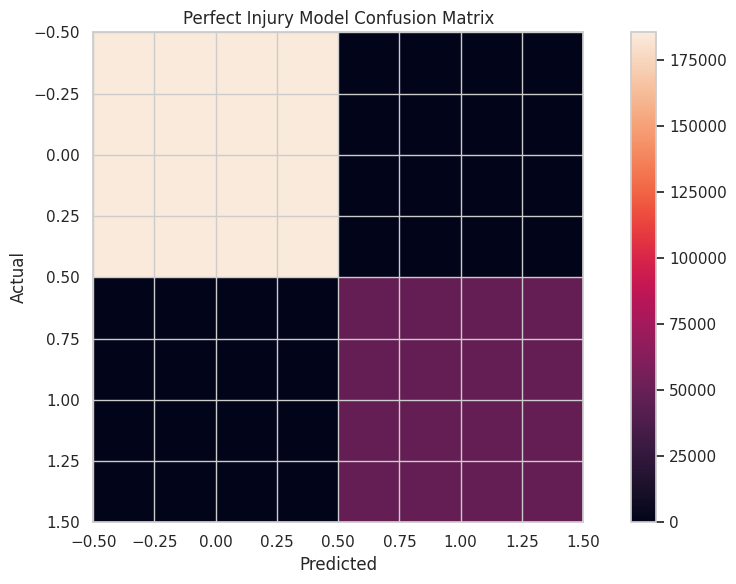

/tmp/ipython-input-84514116.py:48: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["CRASH_HOUR"] = pd.to_datetime(df["CRASH TIME"], errors="coerce").dt.hour



=== MODEL 2: Vehicle Type + Crash Hour ===
Accuracy: 0.6295773261611013
Confusion Matrix:
 [[118313  67148]
 [ 19412  28806]]


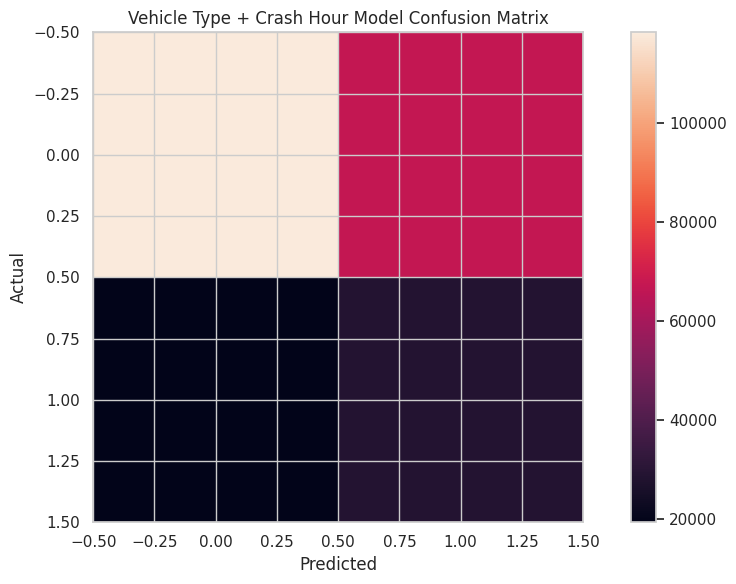

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv("output.csv")
df["injury_flag"] = df["NUMBER OF PERSONS INJURED"].apply(
    lambda x: 1 if x > 0 else 0
)


df["fake_feature"] = df["injury_flag"]  # intentionally high accuracy

X = df[["fake_feature"]]
y = df["injury_flag"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=0
)

perfect_model = LogisticRegression()
perfect_model.fit(X_train, y_train)

pred1 = perfect_model.predict(X_test)
acc1 = accuracy_score(y_test, pred1)
cm1 = confusion_matrix(y_test, pred1)

print("\n=== MODEL 1: Perfect Injury Model (Leakage) ===")
print("Accuracy:", acc1)
print("Confusion Matrix:\n", cm1)

plt.figure()
plt.imshow(cm1)
plt.title("Perfect Injury Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.tight_layout()
plt.show()


# vehicle type and crash time

df["CRASH_HOUR"] = pd.to_datetime(df["CRASH TIME"], errors="coerce").dt.hour
vehicle_col = "VEHICLE TYPE CODE 1"  #this you can mess around with and change to like code 2 for a different result
clean_df = df[["CRASH_HOUR", vehicle_col, "injury_flag"]].dropna()
X2 = clean_df[["CRASH_HOUR", vehicle_col]]
y2 = clean_df["injury_flag"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), [vehicle_col]),
        ("num", "passthrough", ["CRASH_HOUR"])
    ]
)

model2 = LogisticRegression(class_weight="balanced", max_iter=500)

pipe2 = Pipeline([
    ("pre", preprocessor),
    ("model", model2)
])

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.25, stratify=y2, random_state=0
)

pipe2.fit(X2_train, y2_train)
pred2 = pipe2.predict(X2_test)

acc2 = accuracy_score(y2_test, pred2)
cm2 = confusion_matrix(y2_test, pred2)

print("\n=== MODEL 2: Vehicle Type + Crash Hour ===")
print("Accuracy:", acc2)
print("Confusion Matrix:\n", cm2)

plt.figure()
plt.imshow(cm2)
plt.title("Vehicle Type + Crash Hour Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.tight_layout()
plt.show()